In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url) 

# Display the first few rows and the columns
print(df.head())
print(df.columns)


           hour_beginning         location  Pedestrians  Towards Manhattan  \
0  04/30/2019 12:00:00 AM  Brooklyn Bridge            3                  3   
1  12/31/2019 10:00:00 PM  Brooklyn Bridge           10                  9   
2  12/31/2019 11:00:00 PM  Brooklyn Bridge            2                  0   
3  12/31/2019 09:00:00 PM  Brooklyn Bridge           12                  0   
4  04/01/2019 03:00:00 AM  Brooklyn Bridge            1                  0   

   Towards Brooklyn weather_summary  temperature  precipitation        lat  \
0                 0             NaN          NaN            NaN  40.708164   
1                 1          cloudy         42.0         0.0005  40.708164   
2                 2          cloudy         42.0         0.0004  40.708164   
3                12          cloudy         42.0         0.0036  40.708164   
4                 1     clear-night         36.0         0.0000  40.708164   

        long events                              Location1  
0

/tmp/ipykernel_359/1853749242.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


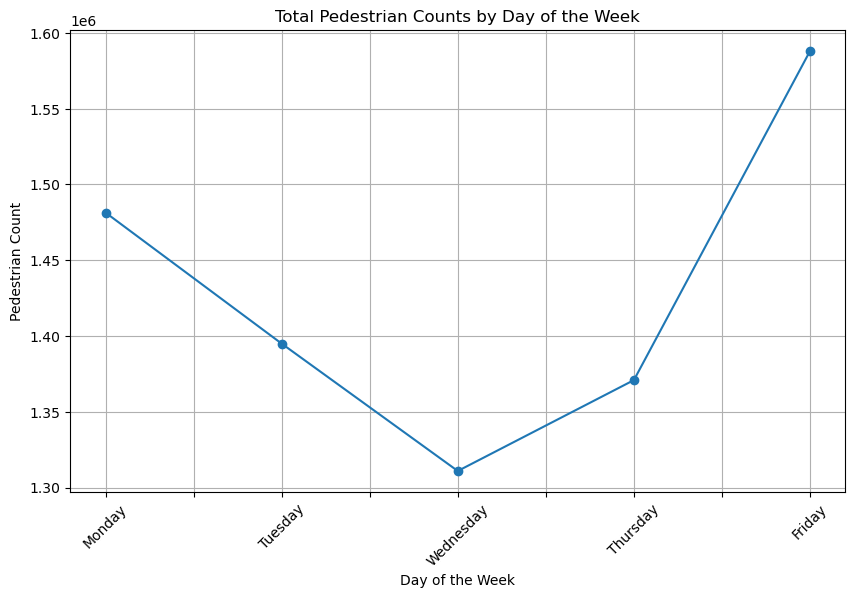

In [4]:
# Convert the hour_beginning column to datetime format
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])

# Filter for weekdays (Monday=0, Sunday=6)
df_weekdays = df[df['hour_beginning'].dt.dayofweek < 5]

# Group by day of the week and sum pedestrian counts
weekly_counts = df_weekdays.groupby(df_weekdays['hour_beginning'].dt.day_name())['Pedestrians'].sum()

# Reorder the index to match the days of the week
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekly_counts = weekly_counts.reindex(ordered_days)

# Plotting
plt.figure(figsize=(10, 6))
weekly_counts.plot(kind='line', marker='o')
plt.title('Total Pedestrian Counts by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Pedestrian Count')
plt.xticks(rotation=45)
plt.grid()
plt.show()

                             Pedestrians  weather_clear-day  \
Pedestrians                     1.000000           0.339758   
weather_clear-day               0.339758           1.000000   
weather_clear-night            -0.377297          -0.227660   
weather_cloudy                 -0.081255          -0.224004   
weather_fog                    -0.026457          -0.022002   
weather_partly-cloudy-day       0.497867          -0.220884   
weather_partly-cloudy-night    -0.282081          -0.175456   
weather_rain                   -0.138581          -0.119645   
weather_sleet                  -0.017091          -0.013257   
weather_snow                   -0.034052          -0.028943   
weather_wind                   -0.000170          -0.009372   

                             weather_clear-night  weather_cloudy  weather_fog  \
Pedestrians                            -0.377297       -0.081255    -0.026457   
weather_clear-day                      -0.227660       -0.224004    -0.022002   


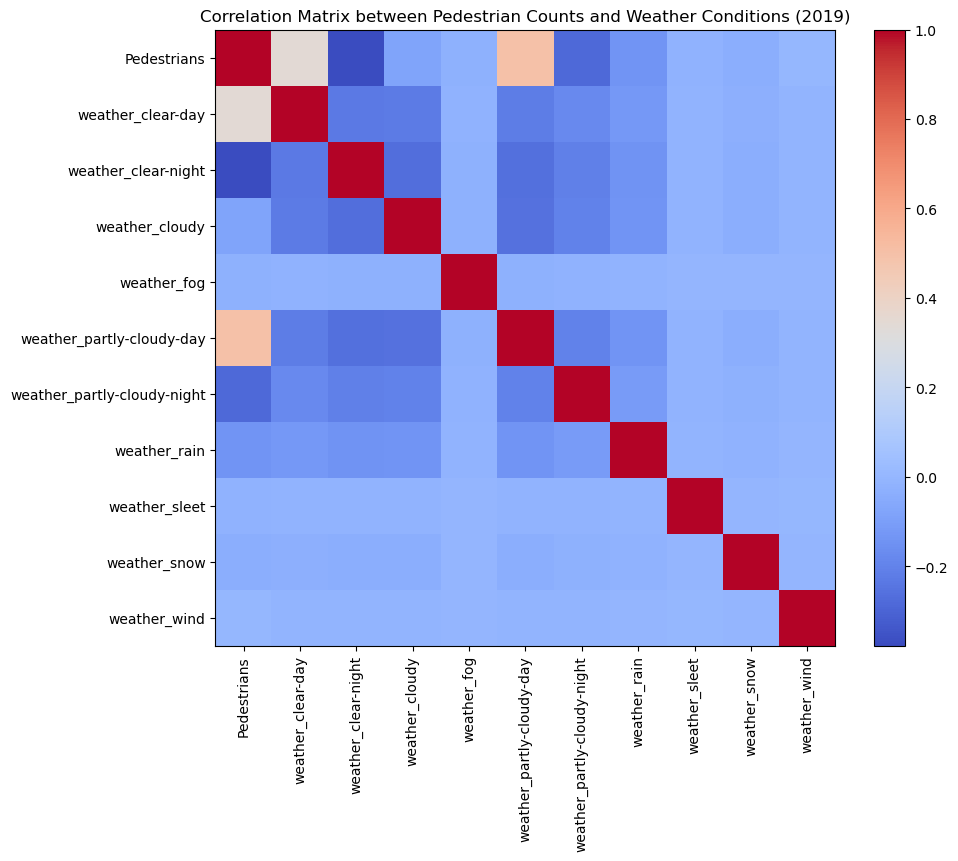

In [6]:
# Filter for the year 2019
df_2019 = df[df['hour_beginning'].dt.year == 2019]

# One-hot encode the weather_summary column
weather_encoded = pd.get_dummies(df_2019['weather_summary'], prefix='weather')

# Combine encoded weather data with pedestrian counts
combined_data = pd.concat([df_2019[['Pedestrians']], weather_encoded], axis=1)

# Calculate the correlation matrix
correlation_matrix = combined_data.corr()

# Display the correlation matrix
print(correlation_matrix)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix between Pedestrian Counts and Weather Conditions (2019)')
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.index)), correlation_matrix.index)
plt.grid(False)
plt.show()

Time_of_Day
Afternoon    5852025
Evening      2432145
Morning      2518979
Night         229717
Name: Pedestrians, dtype: int64


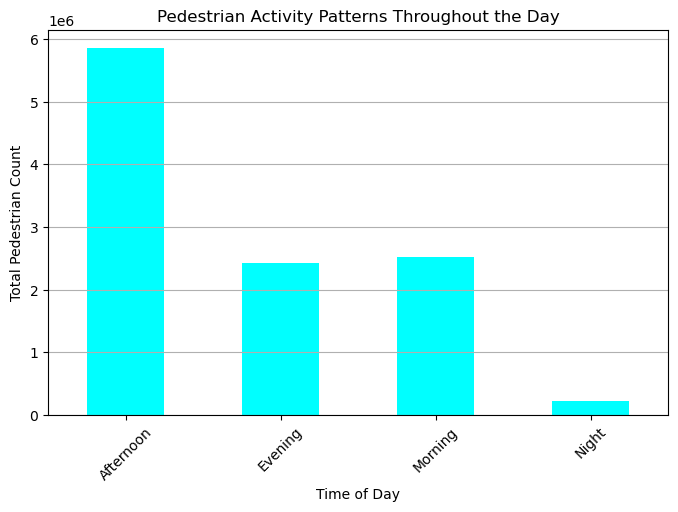

In [8]:
# Function to categorize time of day
def categorize_time_of_day(hour):
    if hour.hour < 12:
        return 'Morning'
    elif hour.hour < 17:
        return 'Afternoon'
    elif hour.hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Create a new column for time of day categories
df['Time_of_Day'] = df['hour_beginning'].apply(categorize_time_of_day)

# Analyze pedestrian activity patterns
activity_by_time = df.groupby('Time_of_Day')['Pedestrians'].sum()

# Display the activity pattern
print(activity_by_time)

# Plotting the pedestrian activity patterns throughout the day
plt.figure(figsize=(8, 5))
activity_by_time.plot(kind='bar', color='cyan')
plt.title('Pedestrian Activity Patterns Throughout the Day')
plt.xlabel('Time of Day')
plt.ylabel('Total Pedestrian Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()